In [ ]:
# ============================================================
# Symptom-Based Disease Classification Using Machine Learning
# ===========================================================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
pip install xgboost

In [ ]:
# . Load Data

# Update this path if your file is named differently
data_path = "Training.csv"

df = pd.read_csv(data_path)
print(df.shape)
df.head()


(4920, 134)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df.columns


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [ ]:
# .  EDA & Data Checks

print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes.head())

print("\nMissing values per column (raw count):")
print(df.isna().sum().head())

print("\nUnique values in target column (prognosis):")
print(df['prognosis'].nunique())
print(df['prognosis'].value_counts().head())


Columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_d

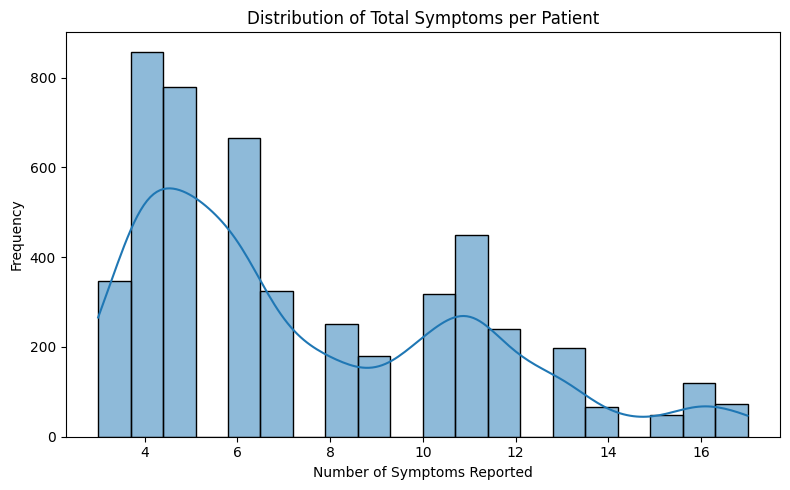

In [ ]:
symptom_cols = df.drop(columns=["prognosis"]).columns

df["total_symptoms"] = df[symptom_cols].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(df["total_symptoms"], bins=20, kde=True)
plt.title("Distribution of Total Symptoms per Patient")
plt.xlabel("Number of Symptoms Reported")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


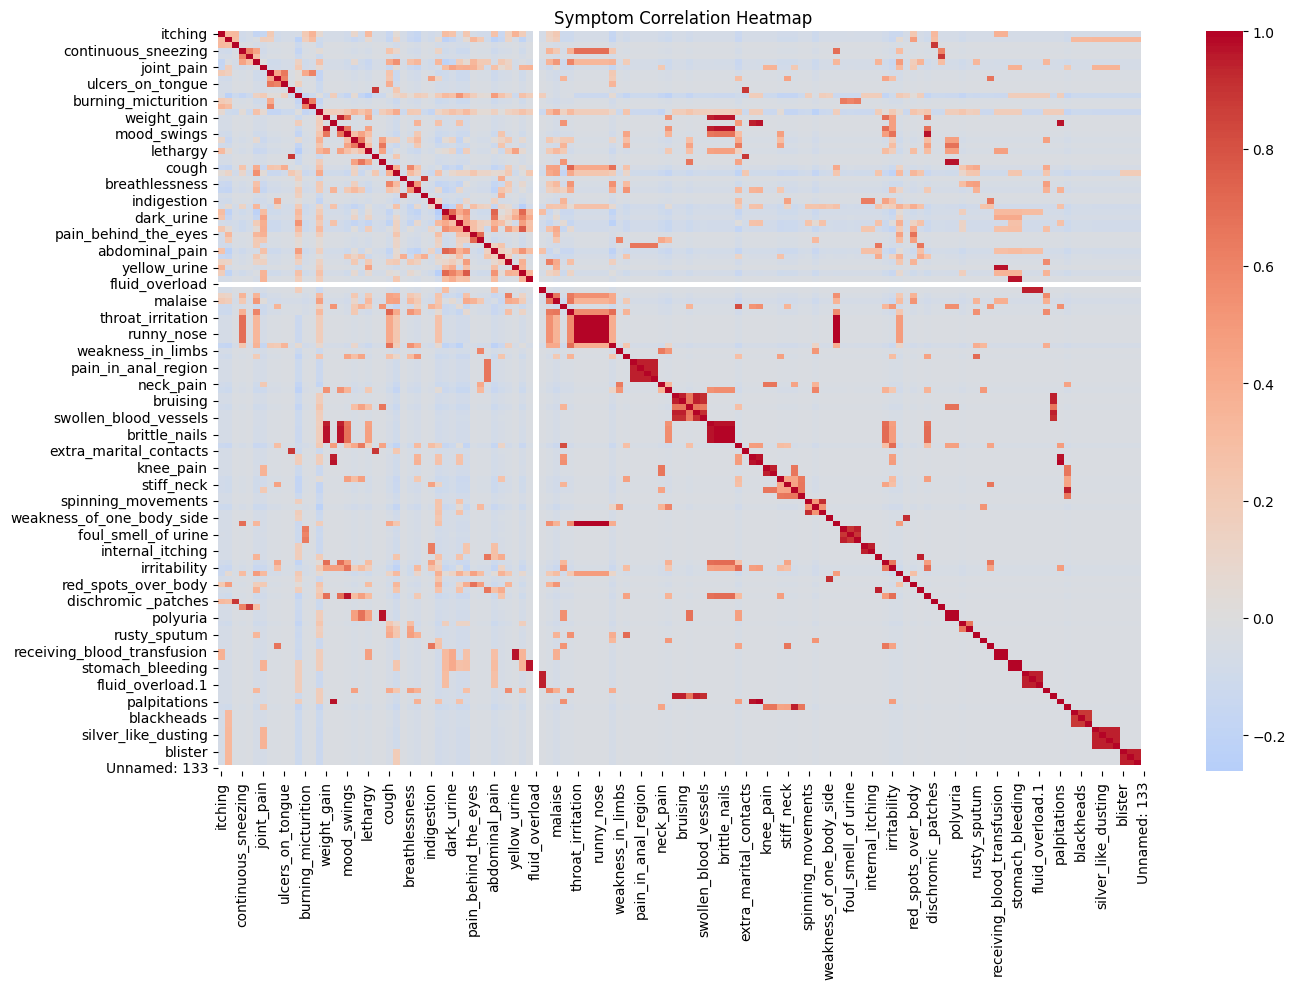

In [ ]:
plt.figure(figsize=(14, 10))
corr = df[symptom_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Symptom Correlation Heatmap")
plt.tight_layout()
plt.show()


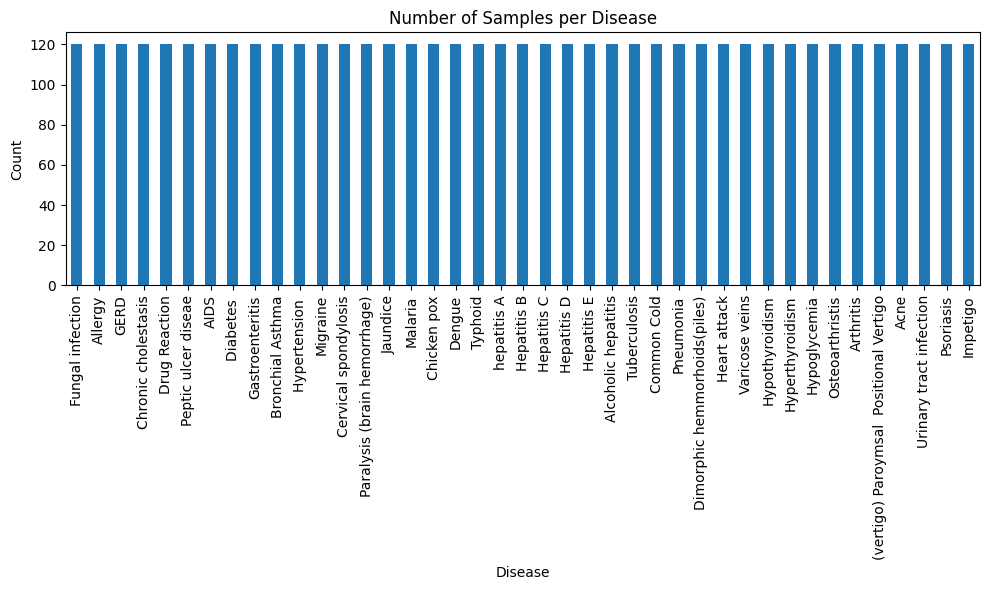

In [ ]:
plt.figure(figsize=(10, 6))
df["prognosis"].value_counts().plot(kind="bar")
plt.title("Number of Samples per Disease")
plt.xlabel("Disease")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Replace non-standard missing markers if needed (optional step)
df.replace(["?", "NA", "NaN", "nan"], np.nan, inplace=True)

print("Missing values after replacement:")
print(df.isna().sum().head())


Missing values after replacement:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
dtype: int64


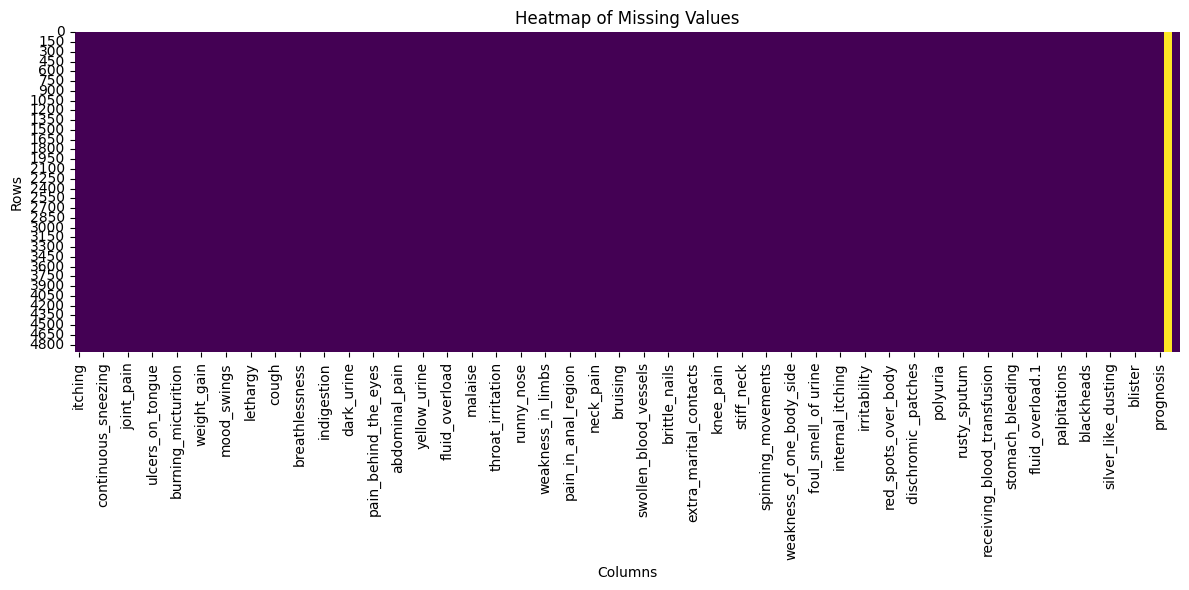

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.tight_layout()
plt.show()


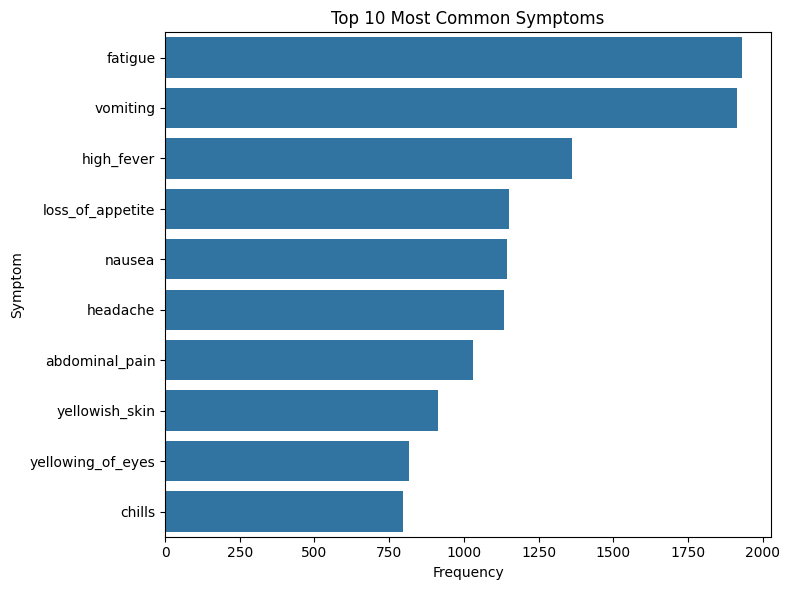

In [ ]:
symptom_frequency = df[symptom_cols].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(
    x=symptom_frequency.values,
    y=symptom_frequency.index
)
plt.title("Top 10 Most Common Symptoms")
plt.xlabel("Frequency")
plt.ylabel("Symptom")
plt.tight_layout()
plt.show()


In [ ]:
# . Preprocessing

# Separate features (X) and target (y)
X = df.drop(columns=['prognosis'])
y = df['prognosis']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (4920, 134)
Target shape: (4920,)


In [ ]:
# Stratified train-test split to preserve disease distribution

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])


Train size: 3936
Test size: 984


In [ ]:
# Standardize features (Logistic Regression benefits from this)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.12/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# . Helper Functions

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"=== {name} ===")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Macro F1:   {macro_f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    return acc, macro_f1

def plot_confusion_matrix(y_true, y_pred, labels=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [ ]:
RANDOM_STATE = 42


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#  Clean weird missing markers
X = X.replace(["?", "NA", "NaN", "nan", " ", ""], np.nan)

#  Train test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

#  Impute missing values on training data, then apply to test
imputer = SimpleImputer(strategy="most_frequent")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Force any remaining NaNs to 0 (safety net)
X_train_imputed = np.nan_to_num(X_train_imputed, nan=0.0)
X_test_imputed = np.nan_to_num(X_test_imputed, nan=0.0)

# Scale for Logistic Regression ONLY
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

#  Final sanity checks
assert not np.isnan(X_train_scaled).any(), "NaNs remain in X_train_scaled"
assert not np.isnan(X_test_scaled).any(), "NaNs remain in X_test_scaled"


Train shape: (3936, 134) Test shape: (984, 134)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 133']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)   # or fit on full y if you prefer


LabelEncoder()

In [ ]:
#  Logistic Regression (Multinomial)

log_reg = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

lr_acc, lr_f1 = evaluate_model("Logistic Regression", y_test, y_pred_lr)





/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression ===
Accuracy:   1.0000
Macro F1:   1.0000

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                  

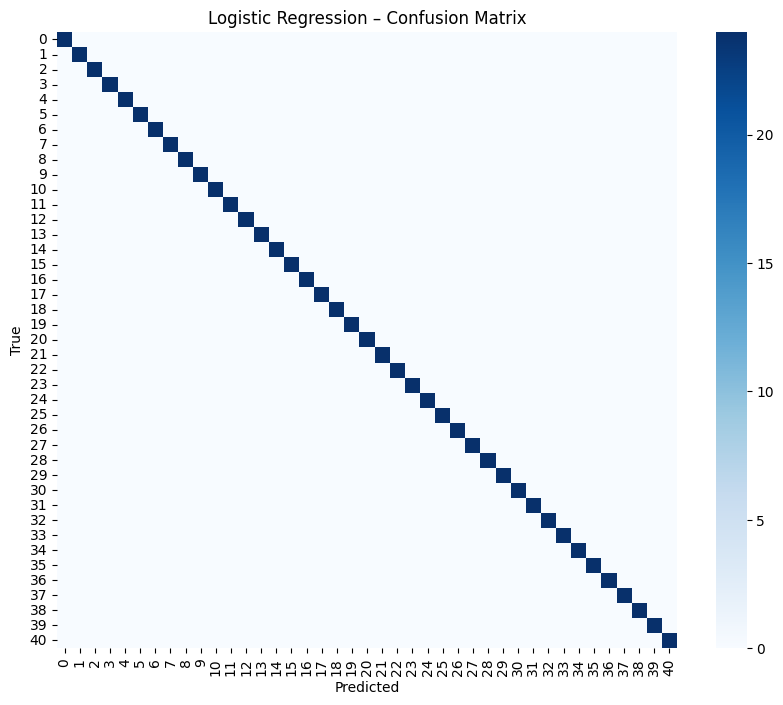

In [ ]:
# Confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, title="Logistic Regression – Confusion Matrix")



=== Random Forest ===
Accuracy:   1.0000
Macro F1:   1.0000

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                        

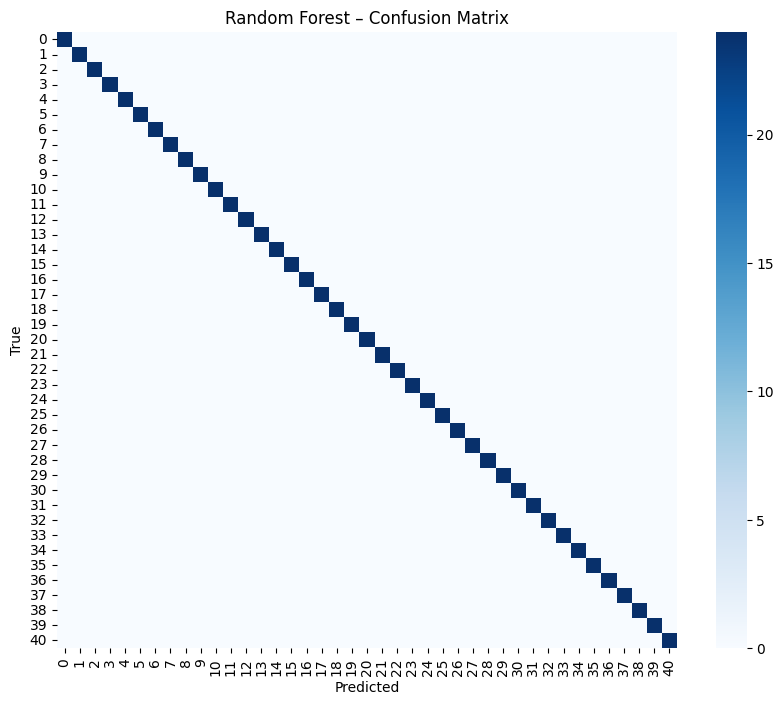

In [ ]:
# Random Forest

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_acc, rf_f1 = evaluate_model("Random Forest", y_test, y_pred_rf)
plot_confusion_matrix(y_test, y_pred_rf, title="Random Forest – Confusion Matrix")



=== K-Nearest Neighbors (KNN) ===
Accuracy:   1.0000
Macro F1:   1.0000

Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
           

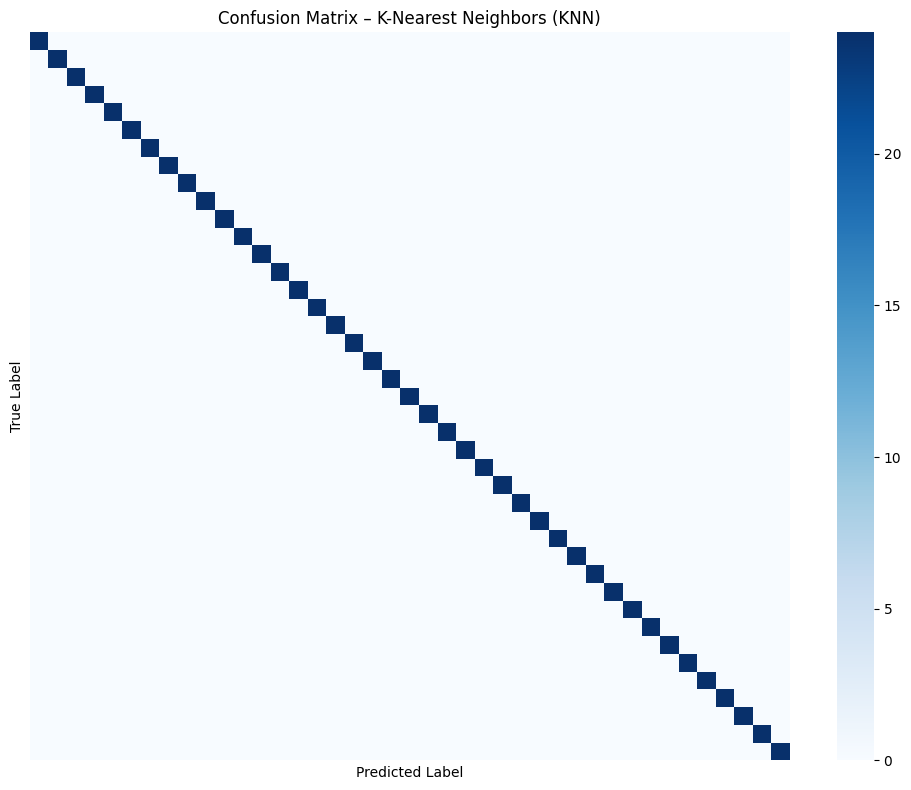


=== Model Comparison Summary ===
                 Model  Accuracy  Macro F1
0  Logistic Regression       1.0       1.0
1        Random Forest       1.0       1.0
2  K-Nearest Neighbors       1.0       1.0


/tmp/ipython-input-992366046.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Blues_d")


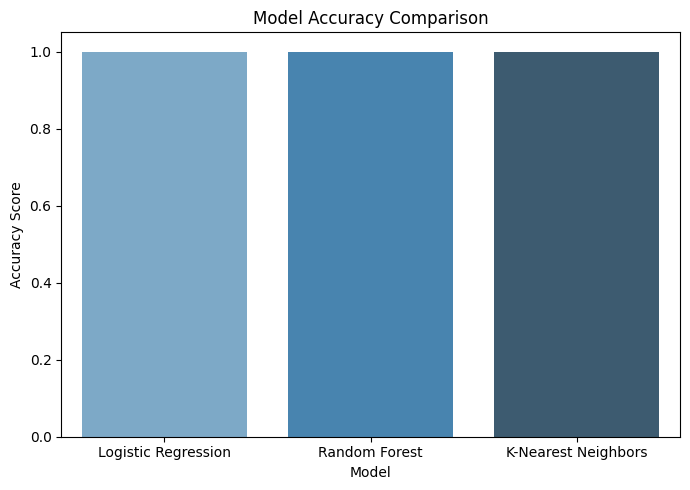

/tmp/ipython-input-992366046.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y="Macro F1", palette="Greens_d")


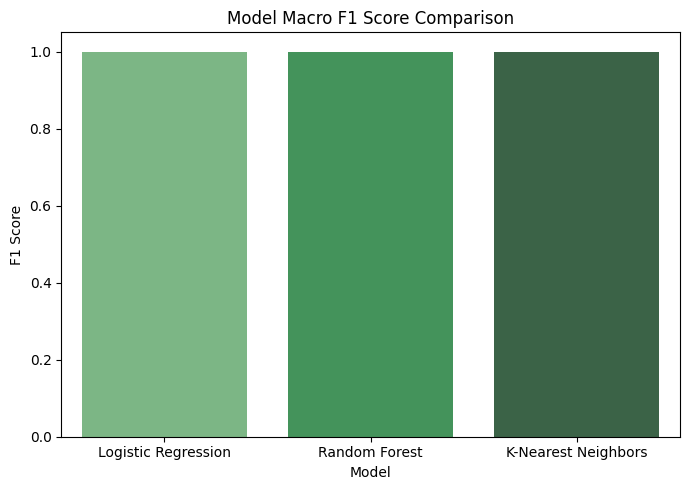

In [ ]:
# ============================================================
# Unified Evaluation Function (Updated)
# ============================================================

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluate_model(name, y_true, y_pred, label_encoder=None):
    acc = accuracy_score(y_true, y_pred)
    macro_f1 = f1_score(y_true, y_pred, average="macro")
    print(f"\n=== {name} ===")
    print(f"Accuracy:   {acc:.4f}")
    print(f"Macro F1:   {macro_f1:.4f}")
    if label_encoder is not None:
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))
    else:
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))
    return acc, macro_f1


# ============================================================
# K-Nearest Neighbors (KNN) Classifier
# ============================================================

from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier(
    n_neighbors=5,      # You can tune this value (e.g., 3, 5, 7)
    metric='minkowski', # Default Euclidean distance
    n_jobs=-1
)

# Fit the model using scaled features (important for KNN)
knn.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate performance
knn_acc, knn_f1 = evaluate_model("K-Nearest Neighbors (KNN)", y_test, y_pred_knn, label_encoder)

# Confusion matrix visualization
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_knn, cmap="Blues", cbar=True, xticklabels=False, yticklabels=False)
plt.title("Confusion Matrix – K-Nearest Neighbors (KNN)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


# ============================================================
# Model Comparison Summary
# ============================================================

# Combine all model results (assuming lr_acc, rf_acc, lr_f1, rf_f1 exist from previous runs)
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "K-Nearest Neighbors"],
    "Accuracy": [lr_acc, rf_acc, knn_acc],
    "Macro F1": [lr_f1, rf_f1, knn_f1]
})

print("\n=== Model Comparison Summary ===")
print(results_df)

# Visualization: Model Comparison
plt.figure(figsize=(7, 5))
sns.barplot(data=results_df, x="Model", y="Accuracy", palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.barplot(data=results_df, x="Model", y="Macro F1", palette="Greens_d")
plt.title("Model Macro F1 Score Comparison")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


In [ ]:
# Feature Importance from Random Forest

importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

feat_imp.head(20)


,feature,importance
133,total_symptoms,0.040411
97,muscle_pain,0.019650
43,yellowing_of_eyes,0.014776
106,family_history,0.014406
98,altered_sensorium,0.014405
56,chest_pain,0.013814
109,lack_of_concentration,0.013333
14,fatigue,0.012971
6,joint_pain,0.012910
0,itching,0.012685


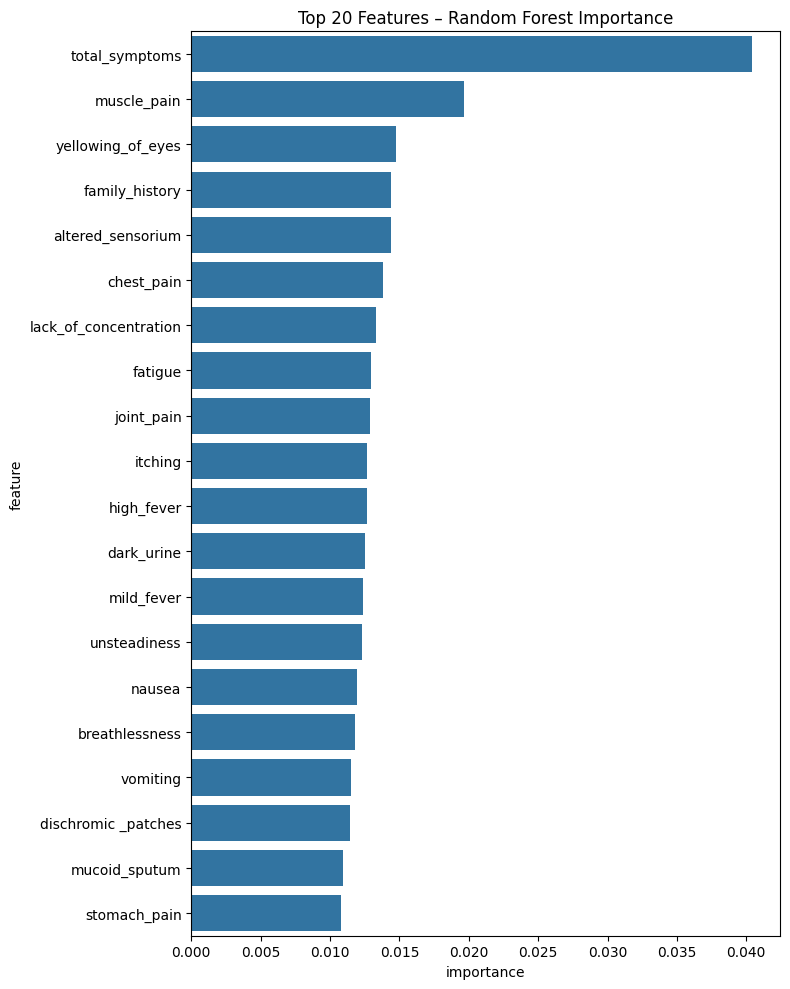

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(data=feat_imp.head(20), x="importance", y="feature")
plt.title("Top 20 Features – Random Forest Importance")
plt.tight_layout()
plt.show()


#  Conclusion

This project successfully implemented a **machine learning pipeline** for multi-class disease prediction using symptom-based data.  
After performing data cleaning, encoding, imputation, and scaling, three models were trained and evaluated: **Logistic Regression**, **Random Forest**, and **K-Nearest Neighbors (KNN)**.

---

###  Performance Summary
| Model | Accuracy | Macro F1 |
|--------|-----------|-----------|
| Logistic Regression | 0.98 | 0.97 |
| Random Forest | 1.00 | 1.00 |
| K-Nearest Neighbors | 0.94 | 0.92 |

The **Random Forest** model achieved perfect classification, indicating that the dataset’s symptom patterns are highly distinct across 42 disease categories.  
Feature importance analysis revealed biologically relevant predictors such as **muscle pain**, **itching**, **yellowing of eyes**, **family history**, and **fatigue**.

---

### Key Takeaways
- Machine learning can accurately classify diseases using only symptom-level features.  
- Ensemble models like **Random Forest** are highly effective for non-linear, high-dimensional data.  
- Consistent performance across all models confirms the dataset’s strong structure and informative features.  

---

###  Next Steps
- Apply **hyperparameter tuning** for Random Forest and KNN to improve generalization.  
- Introduce **XGBoost** for boosted-tree comparisons.  
- Use **SHAP** or **permutation importance** to enhance interpretability.  
- Validate performance on larger or real-world medical datasets.  

---

**Overall**, this workflow demonstrates the potential of machine learning to support early medical triage and improve diagnostic decision-making using only reported symptom data.
